In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Set matplotlib defaults
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Lato"

In [4]:
import graphreadability as gr

In [5]:
Gs = {"Sedgewick": None}
graphs = os.walk('../graphs')
for root, dirs, files in graphs:
    for file in files:
        if file.endswith('.gml'):
            Gs[file] = nx.read_gml(os.path.join(root, file))
        elif file.endswith('.graphml'):
            Gs[file] = nx.read_graphml(os.path.join(root, file))
Gs

{'Sedgewick': None,
 'Dunne_2015_1_c.graphml': <networkx.classes.graph.Graph at 0x7f01aa589210>,
 'Dunne_2015_1_b.graphml': <networkx.classes.graph.Graph at 0x7f01aa589570>,
 'Dunne_2015_1_d.graphml': <networkx.classes.graph.Graph at 0x7f01aa58a200>,
 'Dunne_2015_1_a.graphml': <networkx.classes.graph.Graph at 0x7f01aa589d50>}

In [6]:
# For each graph, plot and print the readability metrics
metric_tables = []
for name, G in Gs.items():
    M = gr.MetricsSuite(G)
    M.calculate_metrics()
    
    # Plot the readability metrics as a table in the second subplot
    metric_table = pd.Series(M.metric_table())
    metric_tables.append(metric_table)

    M.pretty_print_metrics()

Calculated 10 metrics in 0.038 seconds.
--------------------------------------------------
Metric                        Value	Weight
--------------------------------------------------
angular_resolution            0.111	1
aspect_ratio                  0.595	1
crossing_angle                -0.016	1
edge_crossing                 0.741	1
edge_length                   0.589	1
edge_orthogonality            0.514	1
gabriel_ratio                 0.435	1
neighbourhood_preservation    0.125	1
node_resolution               0.092	1
node_uniformity               0.750	1
--------------------------------------------------
Evaluation using weighted_sum: 0.39351
--------------------------------------------------
Calculated 10 metrics in 0.029 seconds.
--------------------------------------------------
Metric                        Value	Weight
--------------------------------------------------
angular_resolution            0.570	1
aspect_ratio                  0.811	1
crossing_angle                1.

In [7]:
tables = pd.DataFrame.from_records(metric_tables, index=Gs.keys(), columns=metric_table.index).sort_values(by="Combined", ascending=False)
tables

,angular_resolution,aspect_ratio,crossing_angle,edge_crossing,edge_length,edge_orthogonality,gabriel_ratio,neighbourhood_preservation,node_resolution,node_uniformity,Combined
Dunne_2015_1_c.graphml,0.570384,0.810811,1.000000,1.000000,0.564179,0.694190,0.875000,0.500000,0.209934,1.000000,0.722450
Dunne_2015_1_b.graphml,0.586345,1.000000,0.830233,0.904762,0.890717,0.553719,0.972222,0.500000,0.273707,0.500000,0.701170
Dunne_2015_1_d.graphml,0.312553,0.715278,0.509530,0.913043,0.710631,0.439352,0.608247,0.288136,0.054880,0.666667,0.521832
Dunne_2015_1_a.graphml,0.253618,0.930636,0.069990,0.785714,0.732881,0.525225,0.711864,0.230769,0.209607,0.750000,0.520030
Sedgewick,0.110907,0.595036,-0.016406,0.740741,0.588843,0.514394,0.434783,0.125000,0.091827,0.750000,0.393512


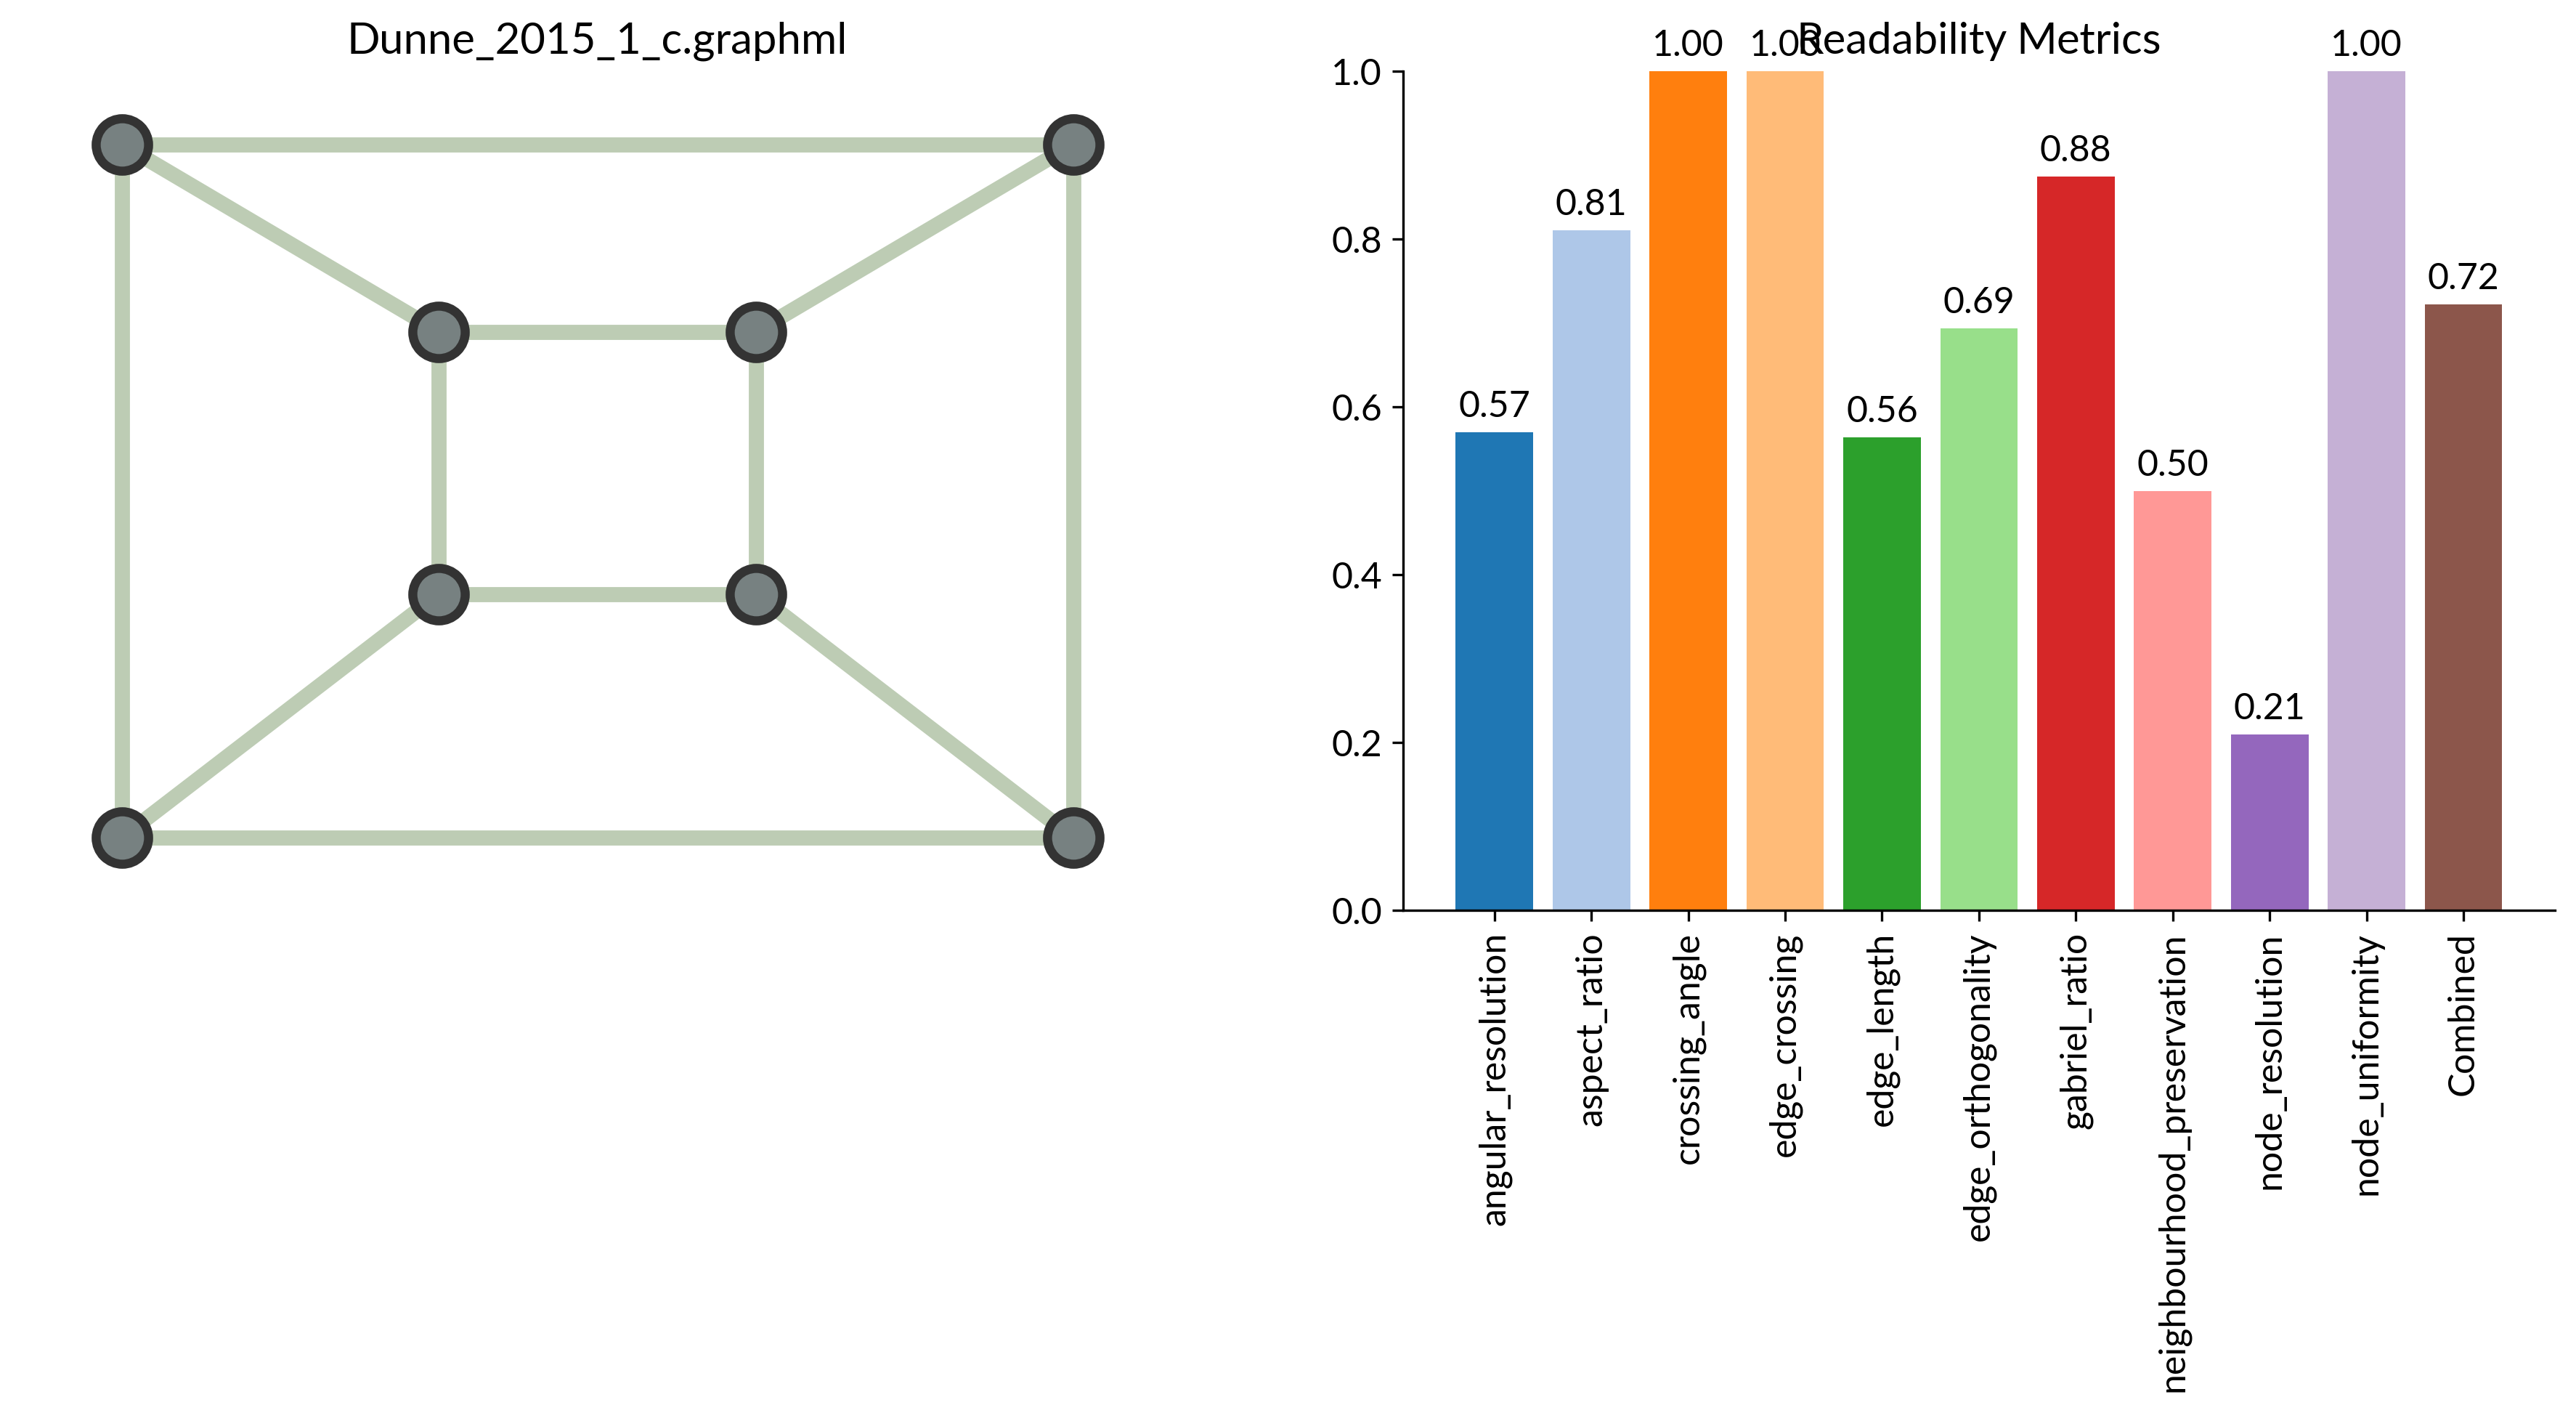

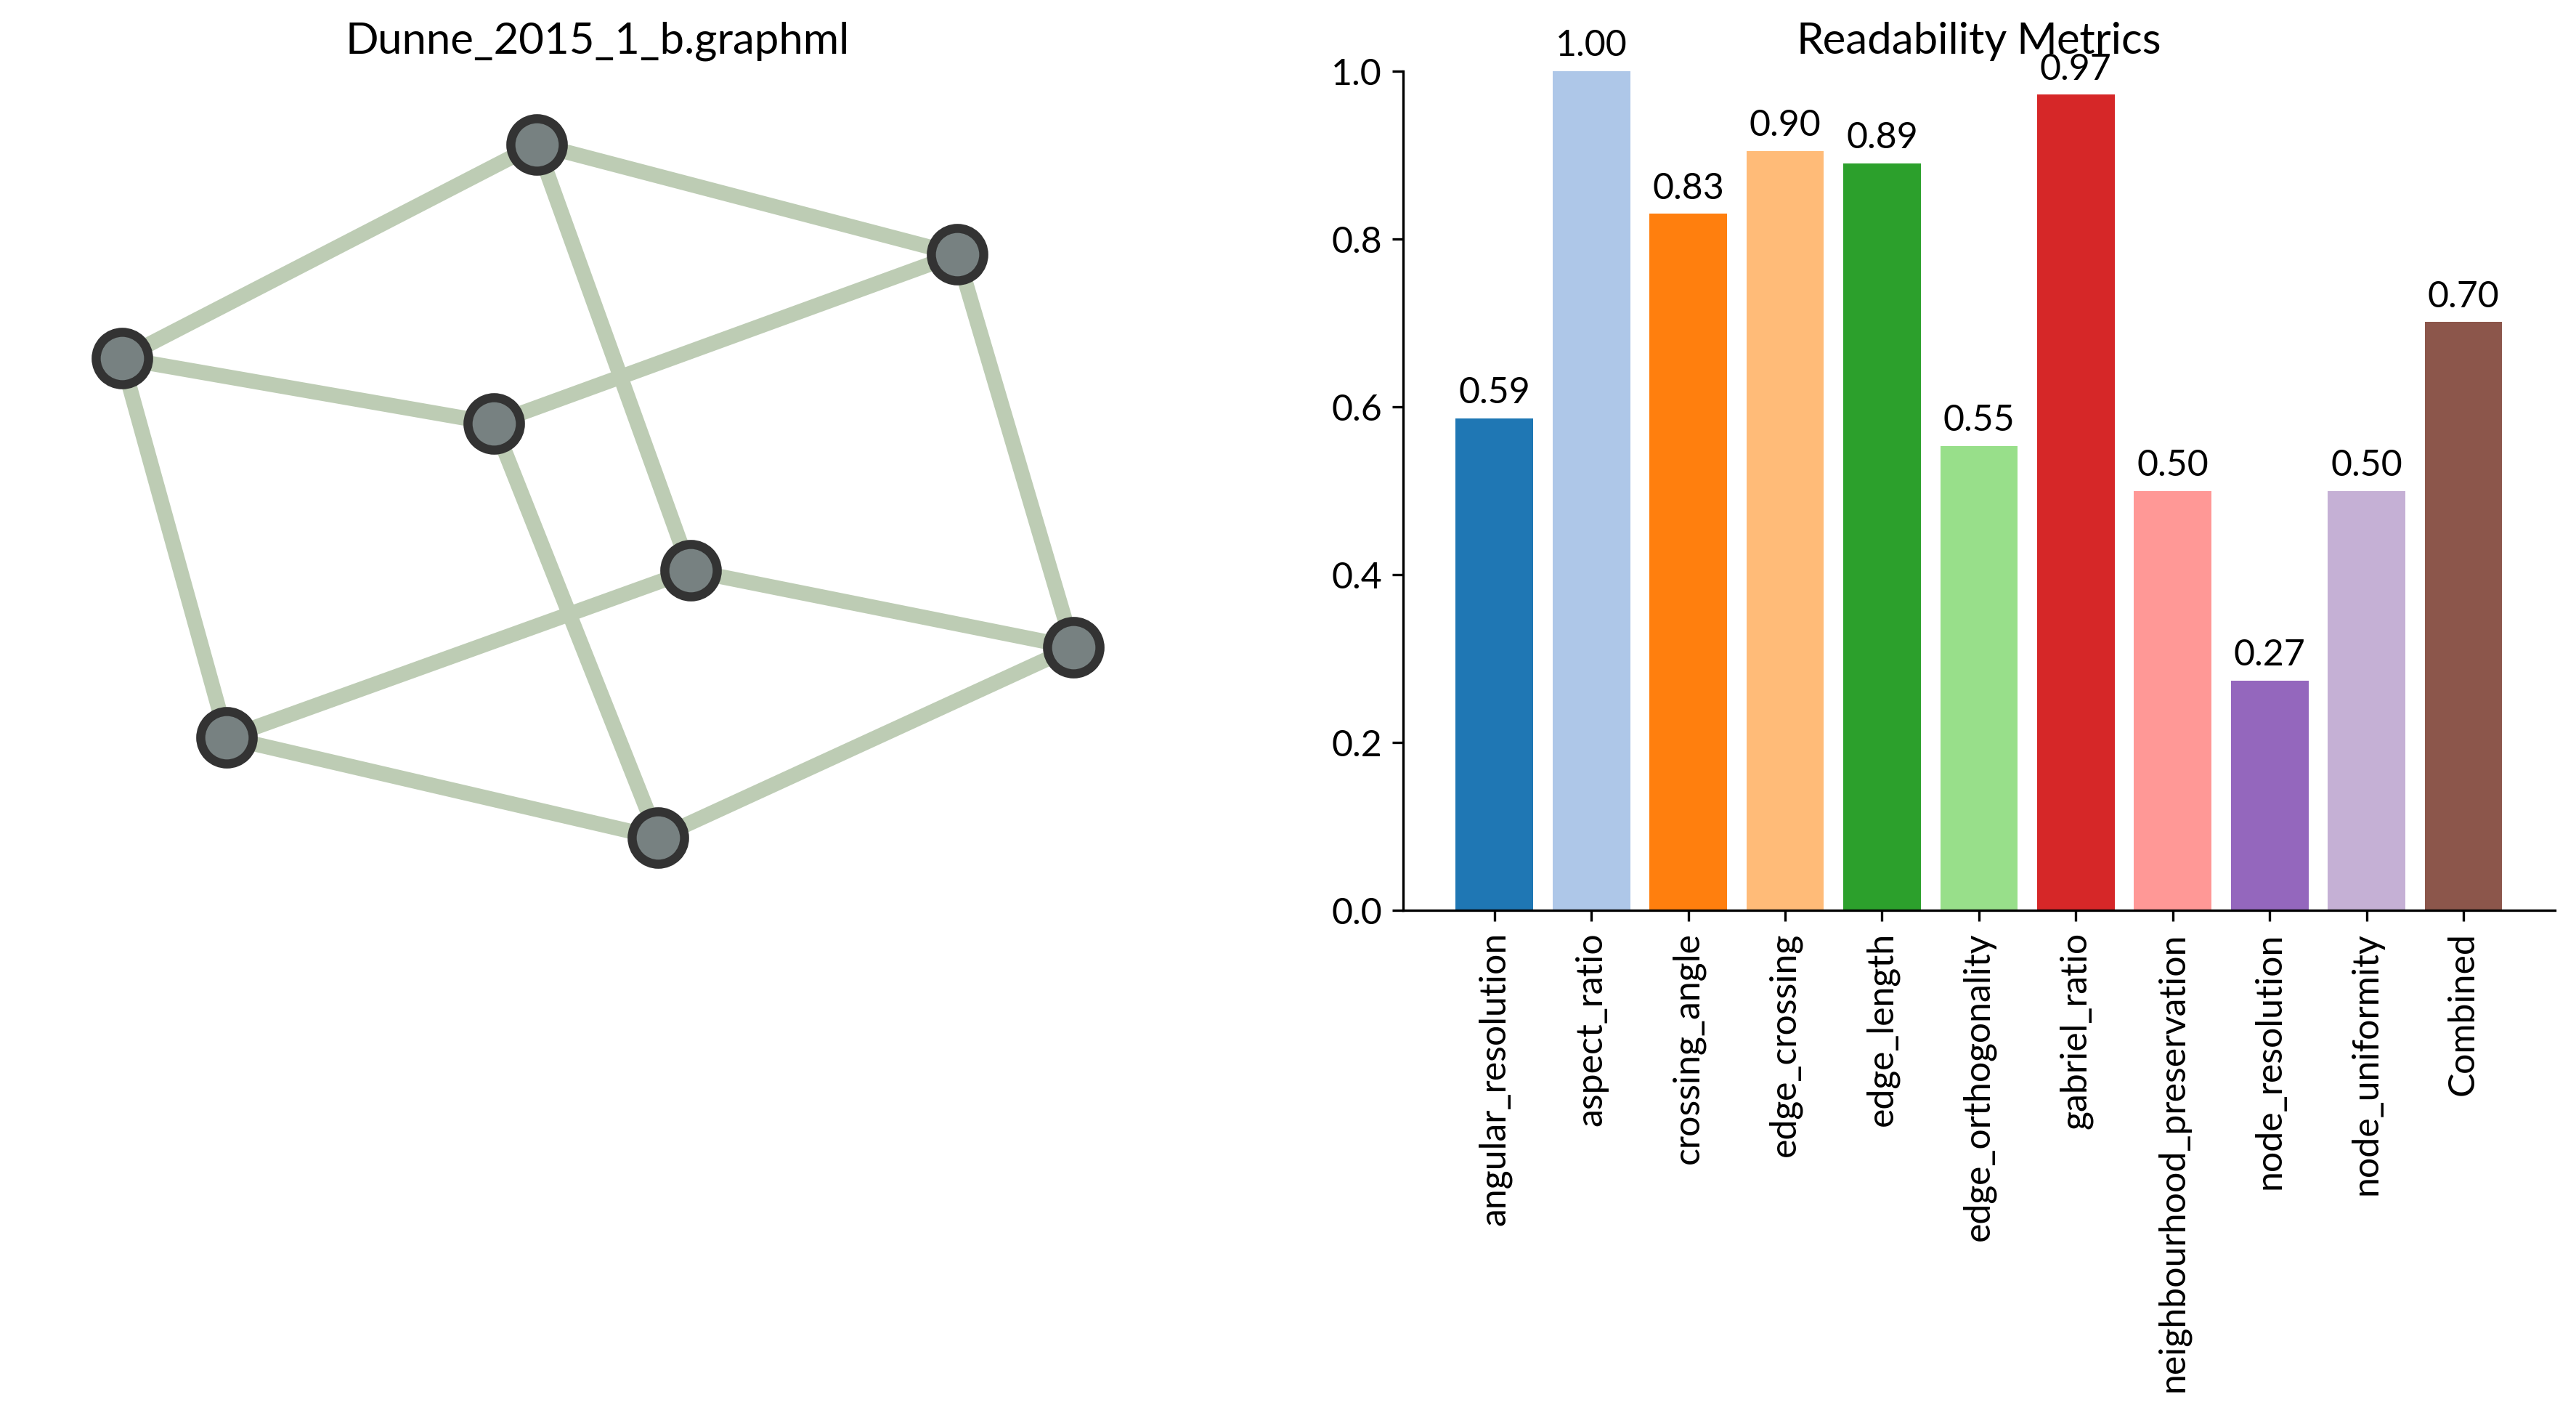

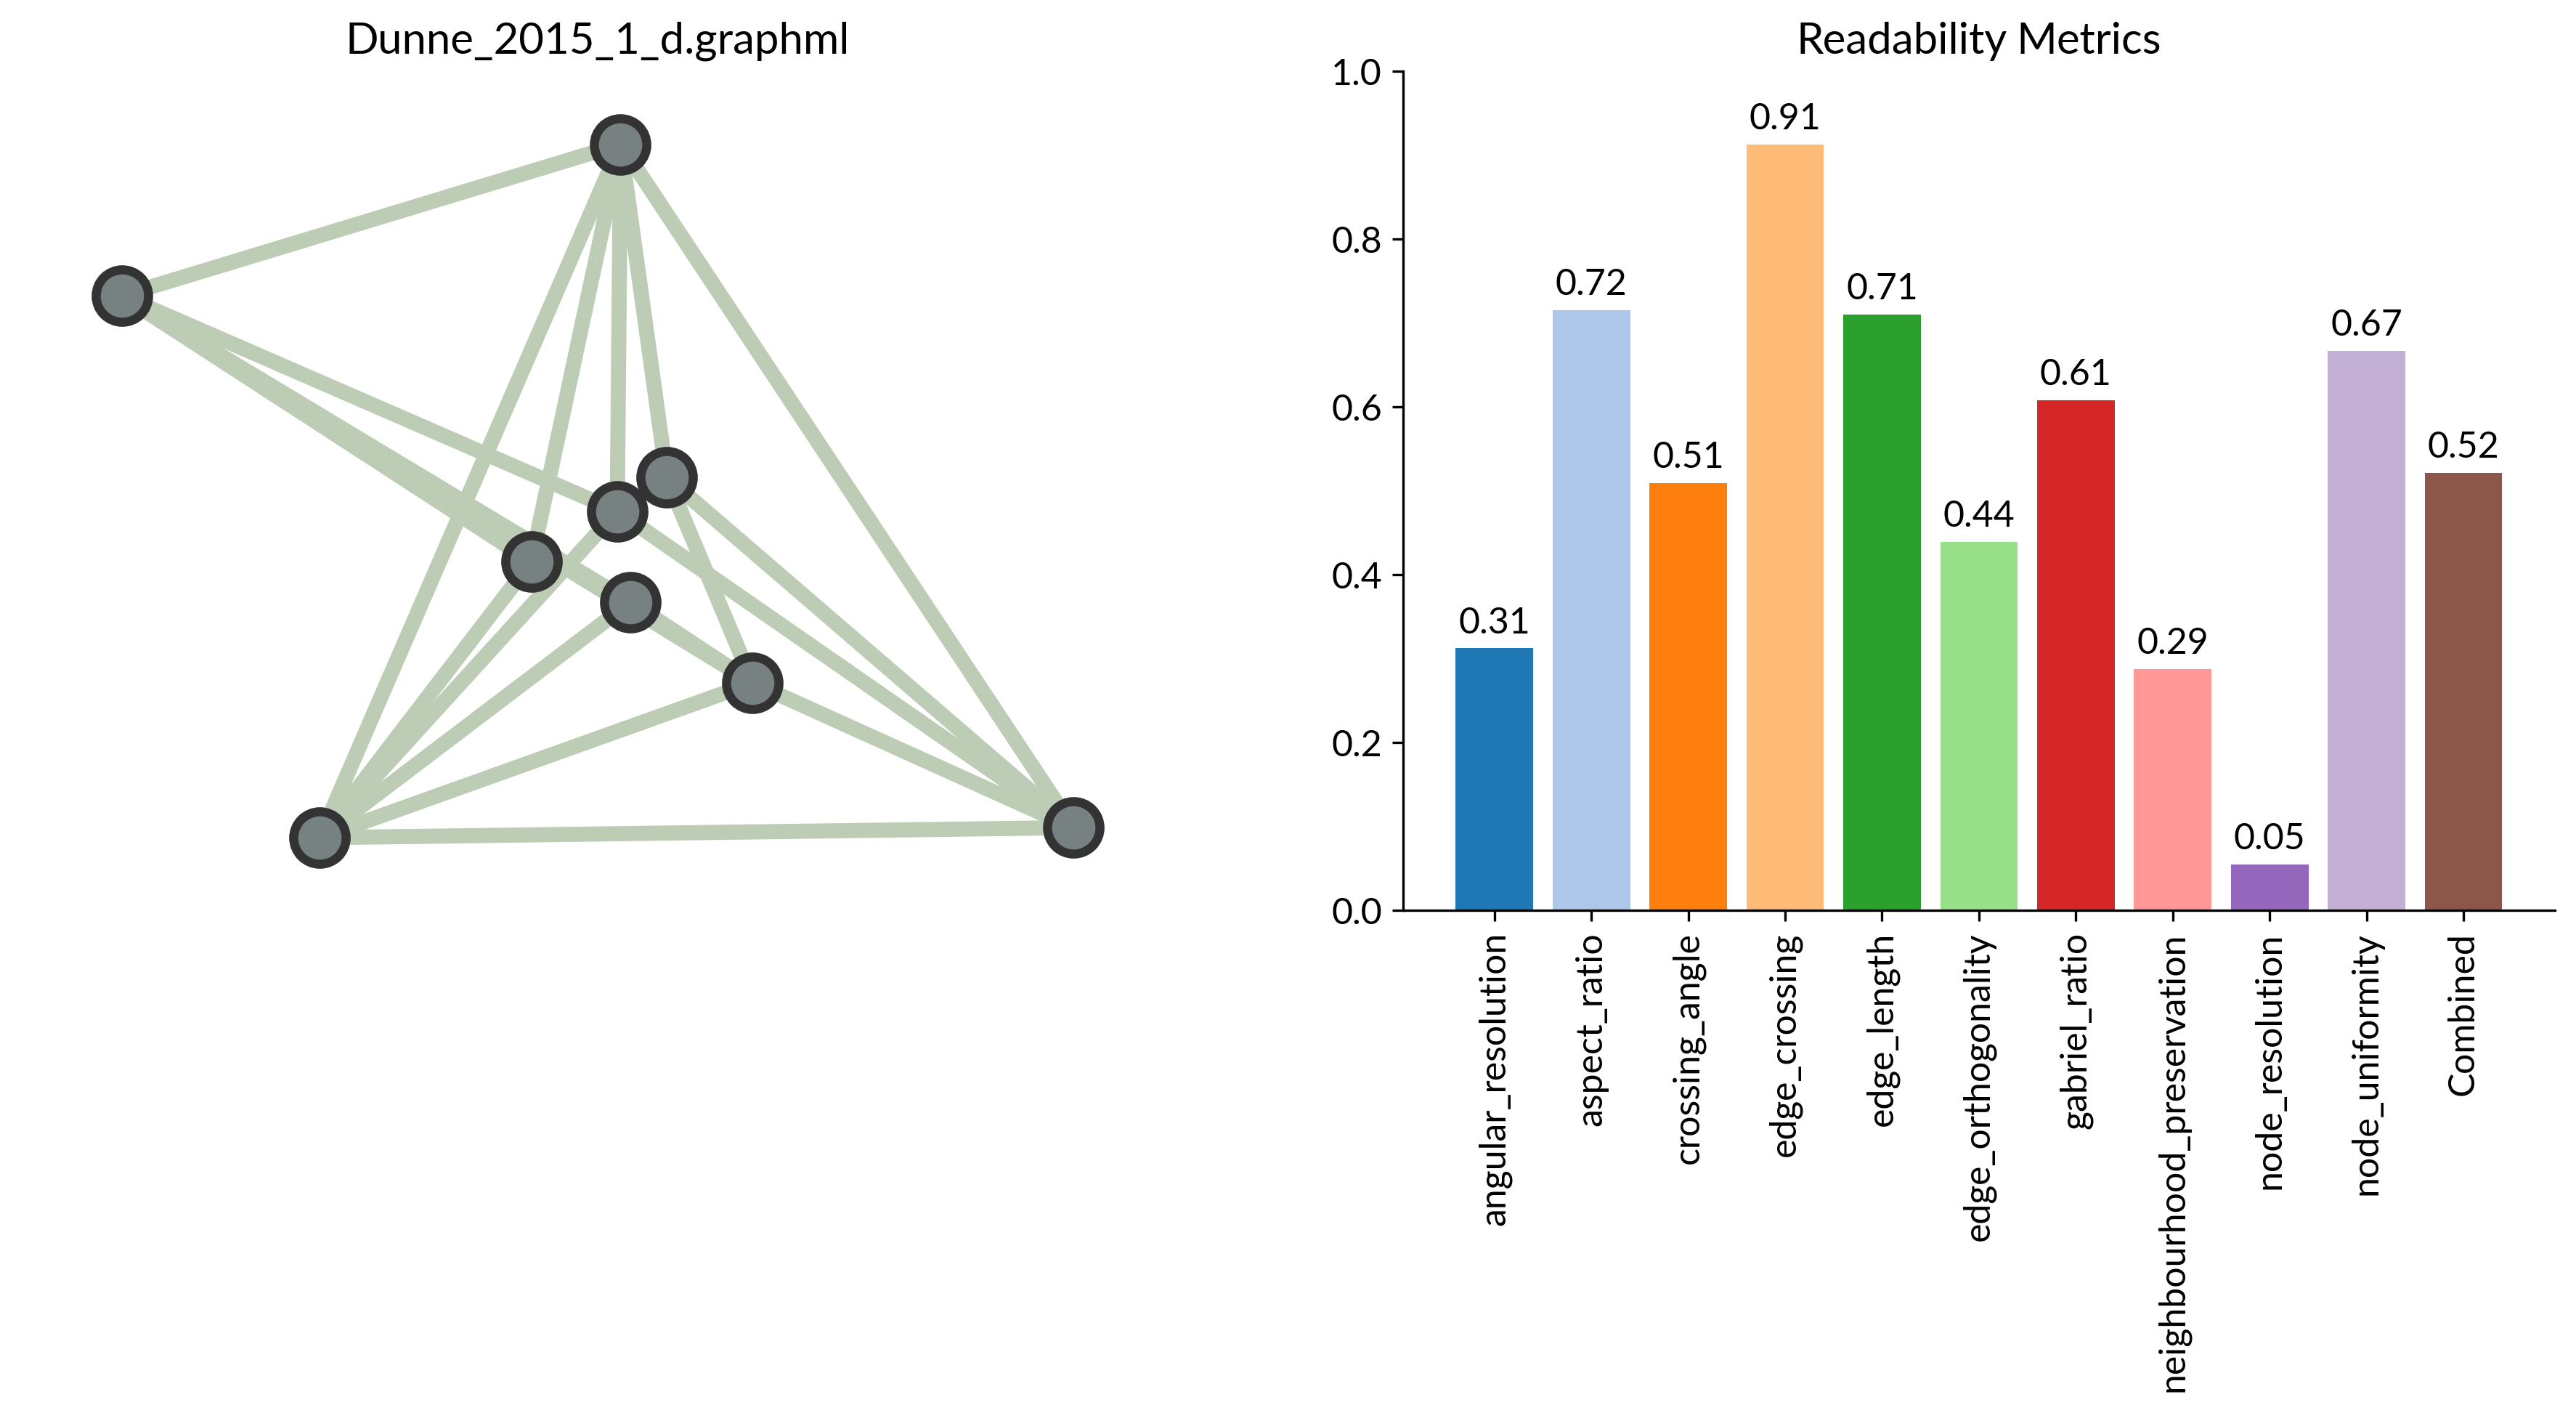

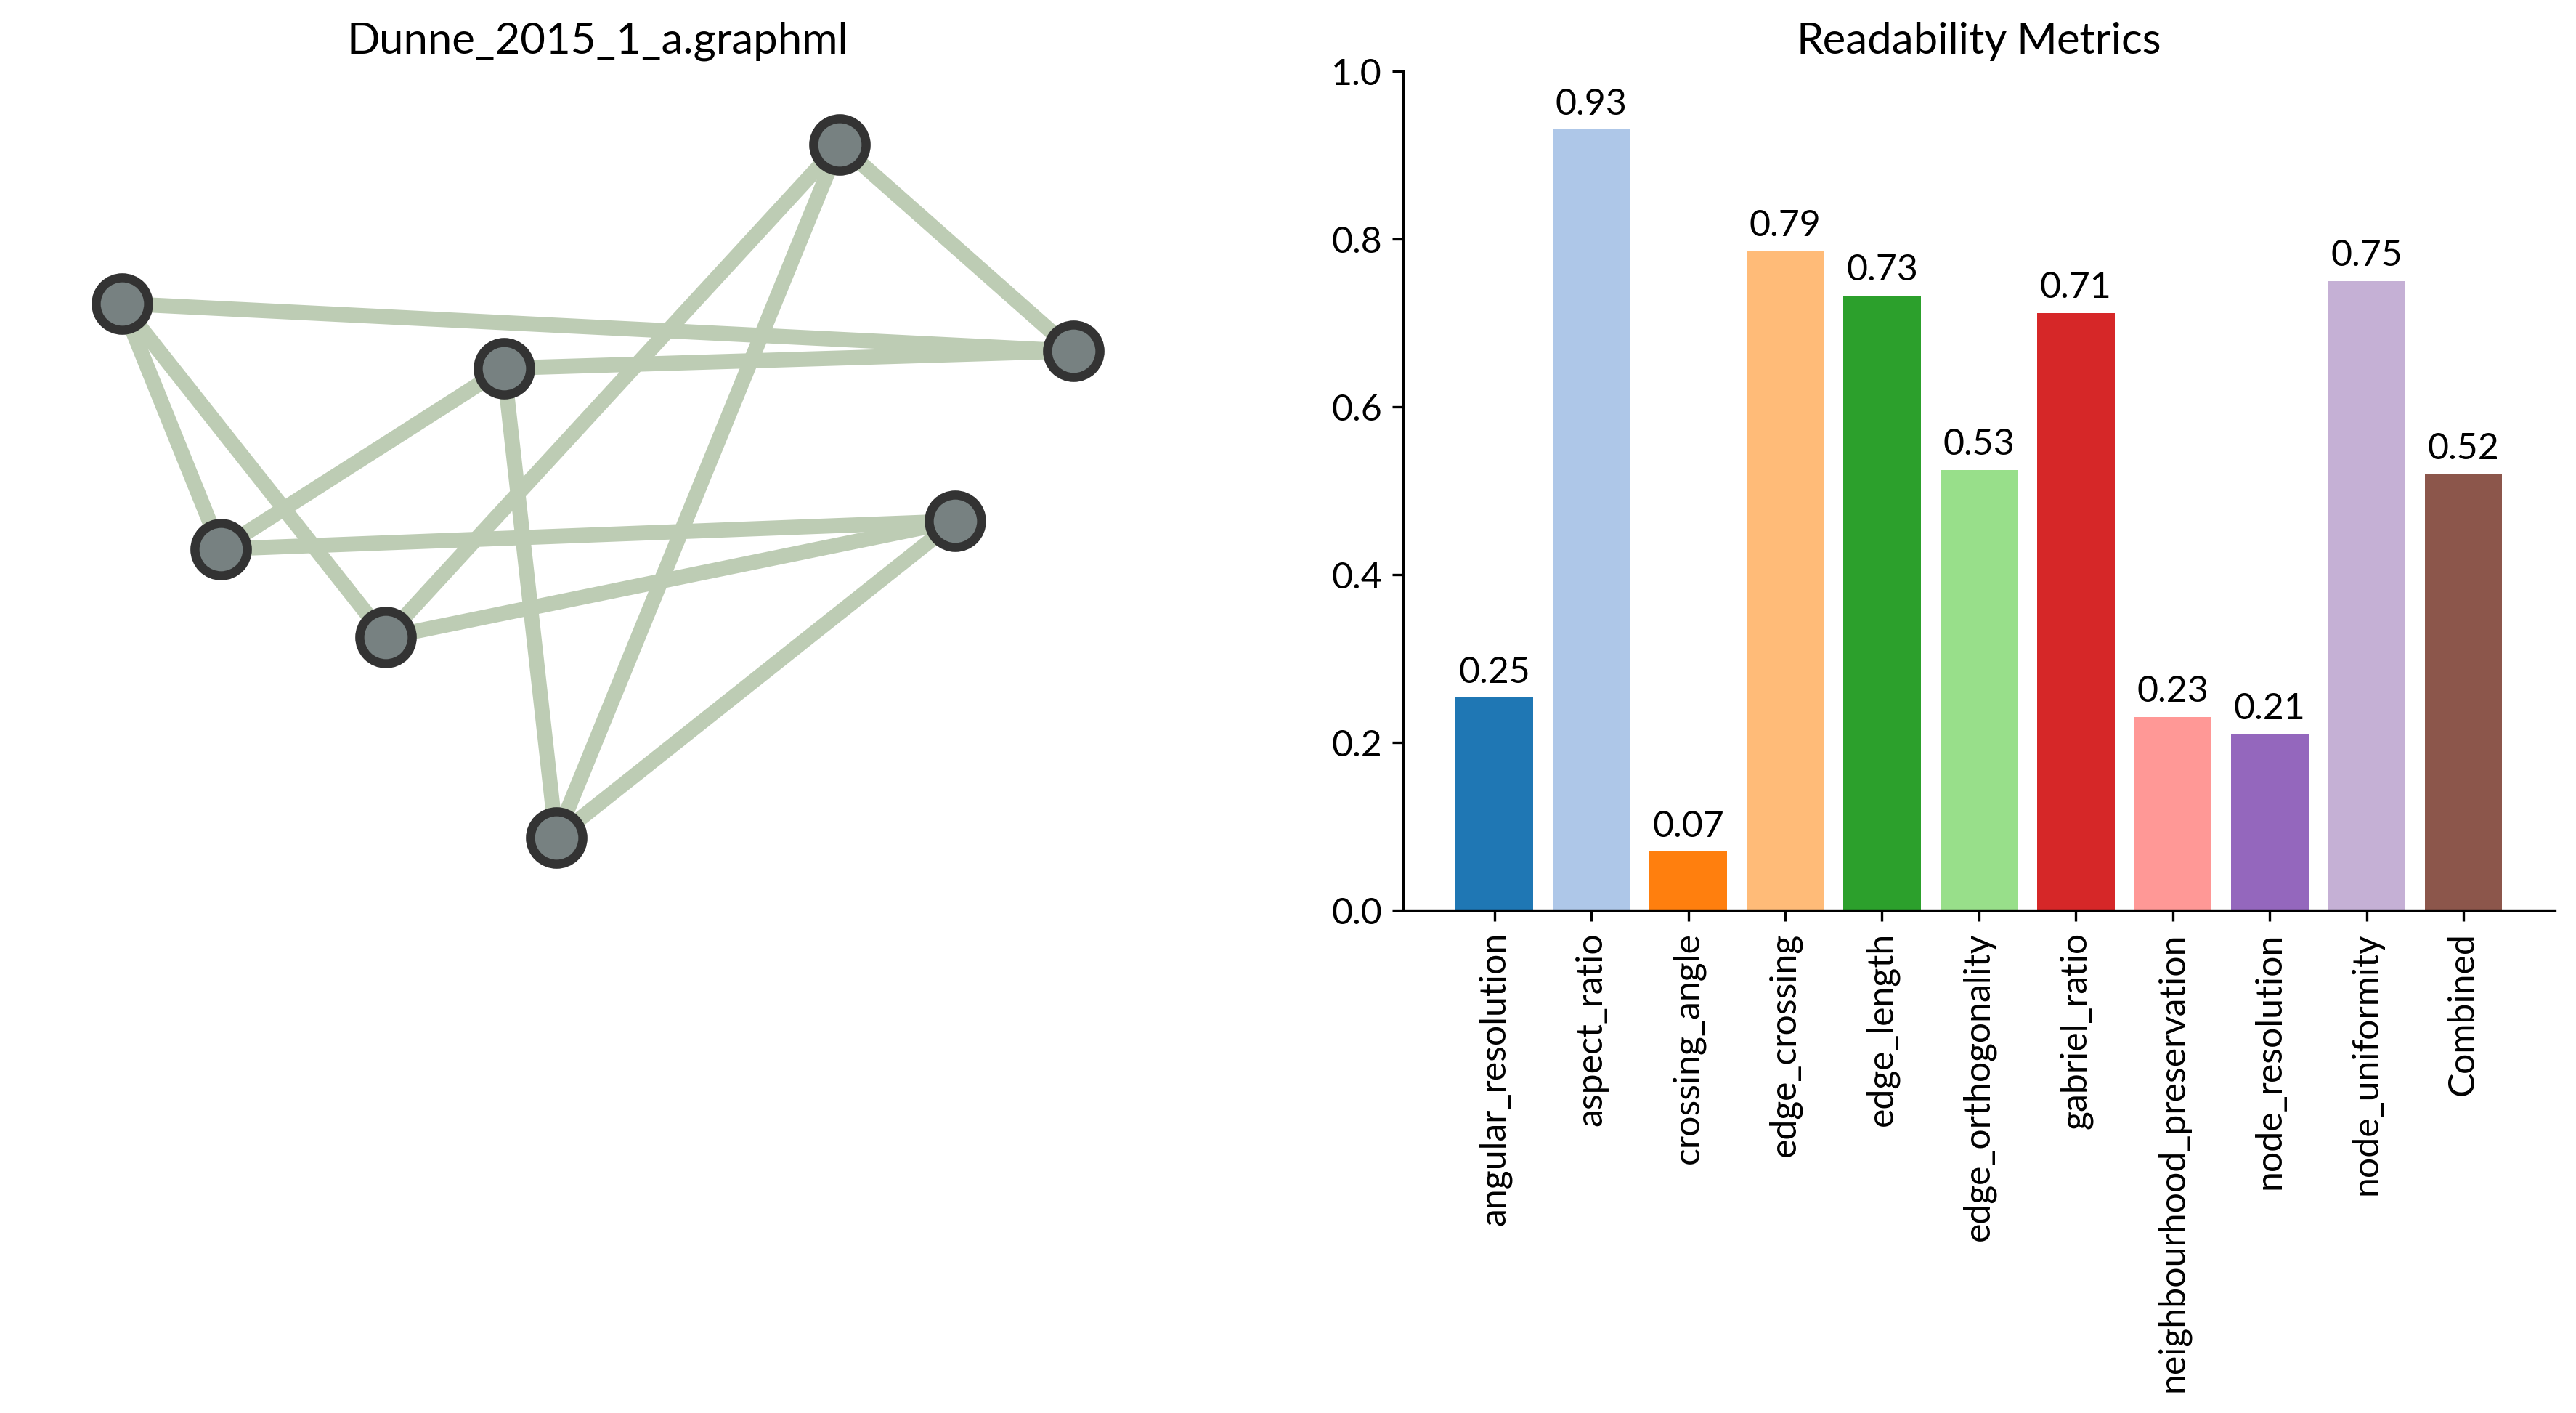

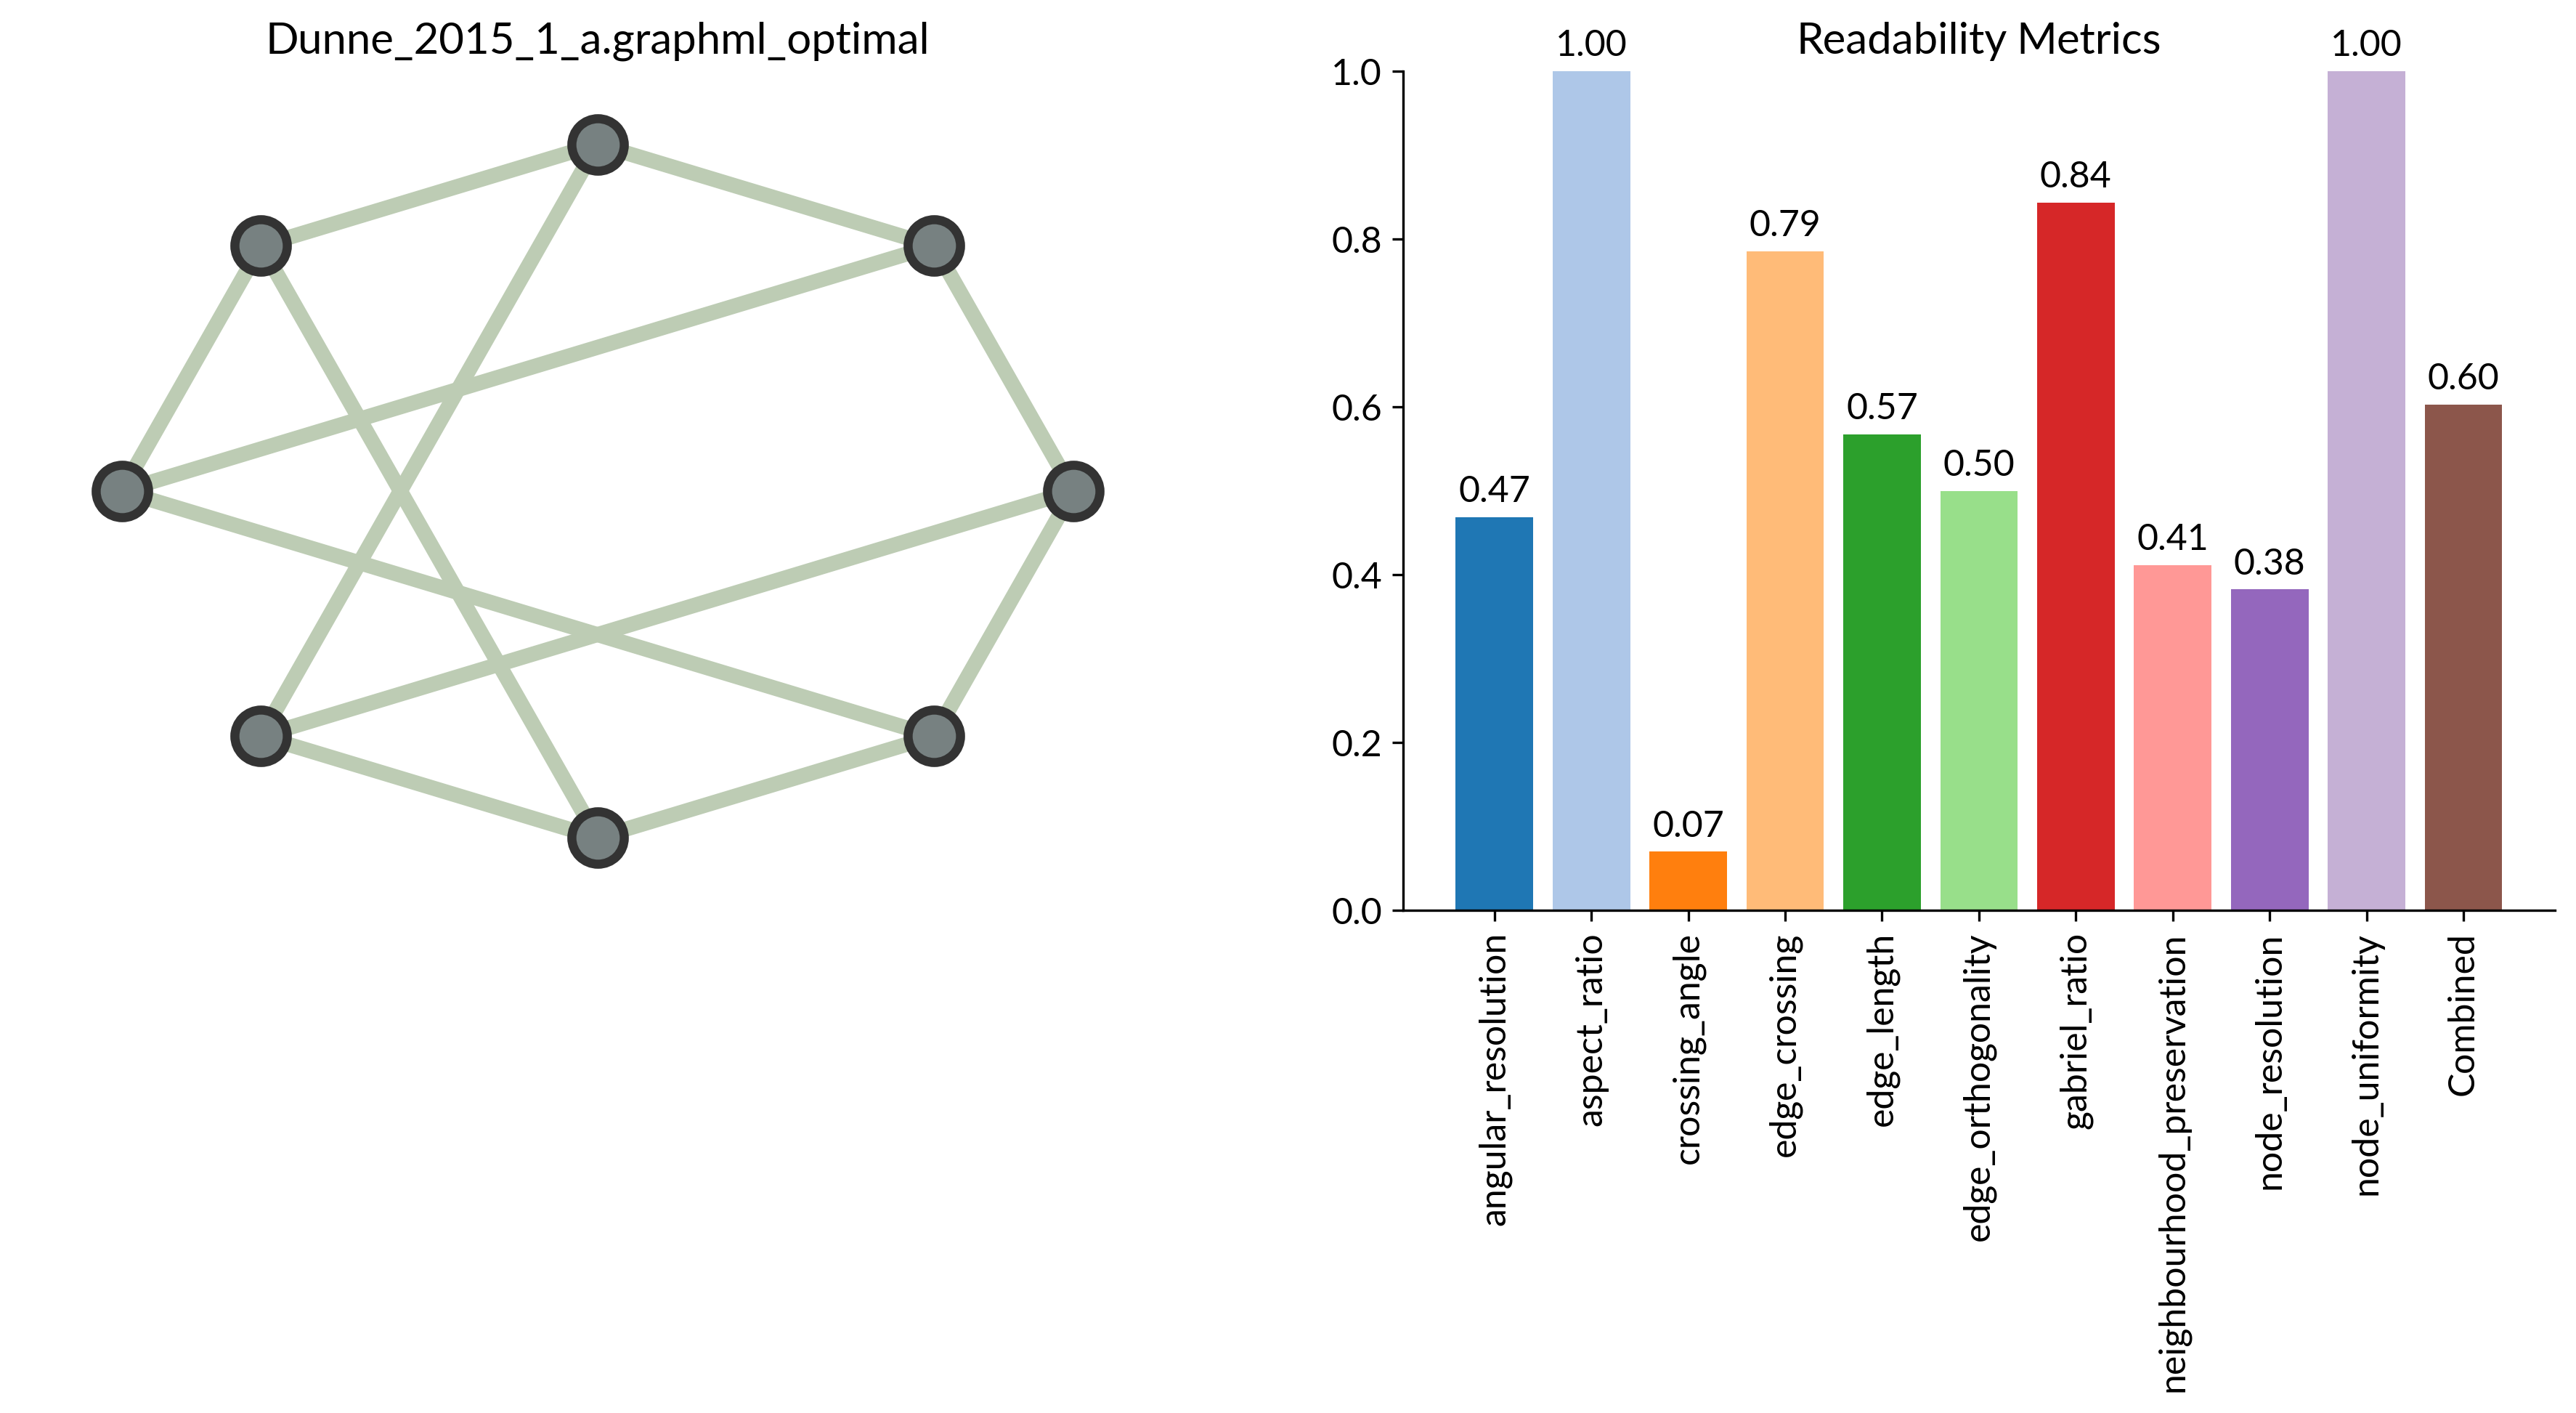

In [18]:
# Create a colormap using tab20 and get the colors for each metric
colors = plt.cm.tab20.colors
colors = colors[:len(tables.columns)]
for name, G in Gs.items():
    if G is None:
        continue
    metric_table = tables.loc[name]
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].set_title(name)
    gr.helpers.draw_graph(G, ax=ax[0])

    # Plot the readability metrics in the second subplot
    ax[1].bar(metric_table.index, metric_table.values, color=colors)
    ax[1].bar_label(ax[1].containers[0], fmt='%0.2f', label_type='edge', padding=3)
    ax[1].set_title("Readability Metrics")
    # Rotate xticks 90 degrees
    ax[1].set_xticks(range(len(metric_table.index)))
    ax[1].set_xticklabels(metric_table.index, rotation=90)
    # Turn off top and right spines
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    # Label axes
    # ax[1].set_ylabel("Value")
    # ax[1].set_xlabel("Metric")
    # Set ylim
    ax[1].set_ylim(0, 1)

    plt.savefig(f"../figs/{name}.svg")

    

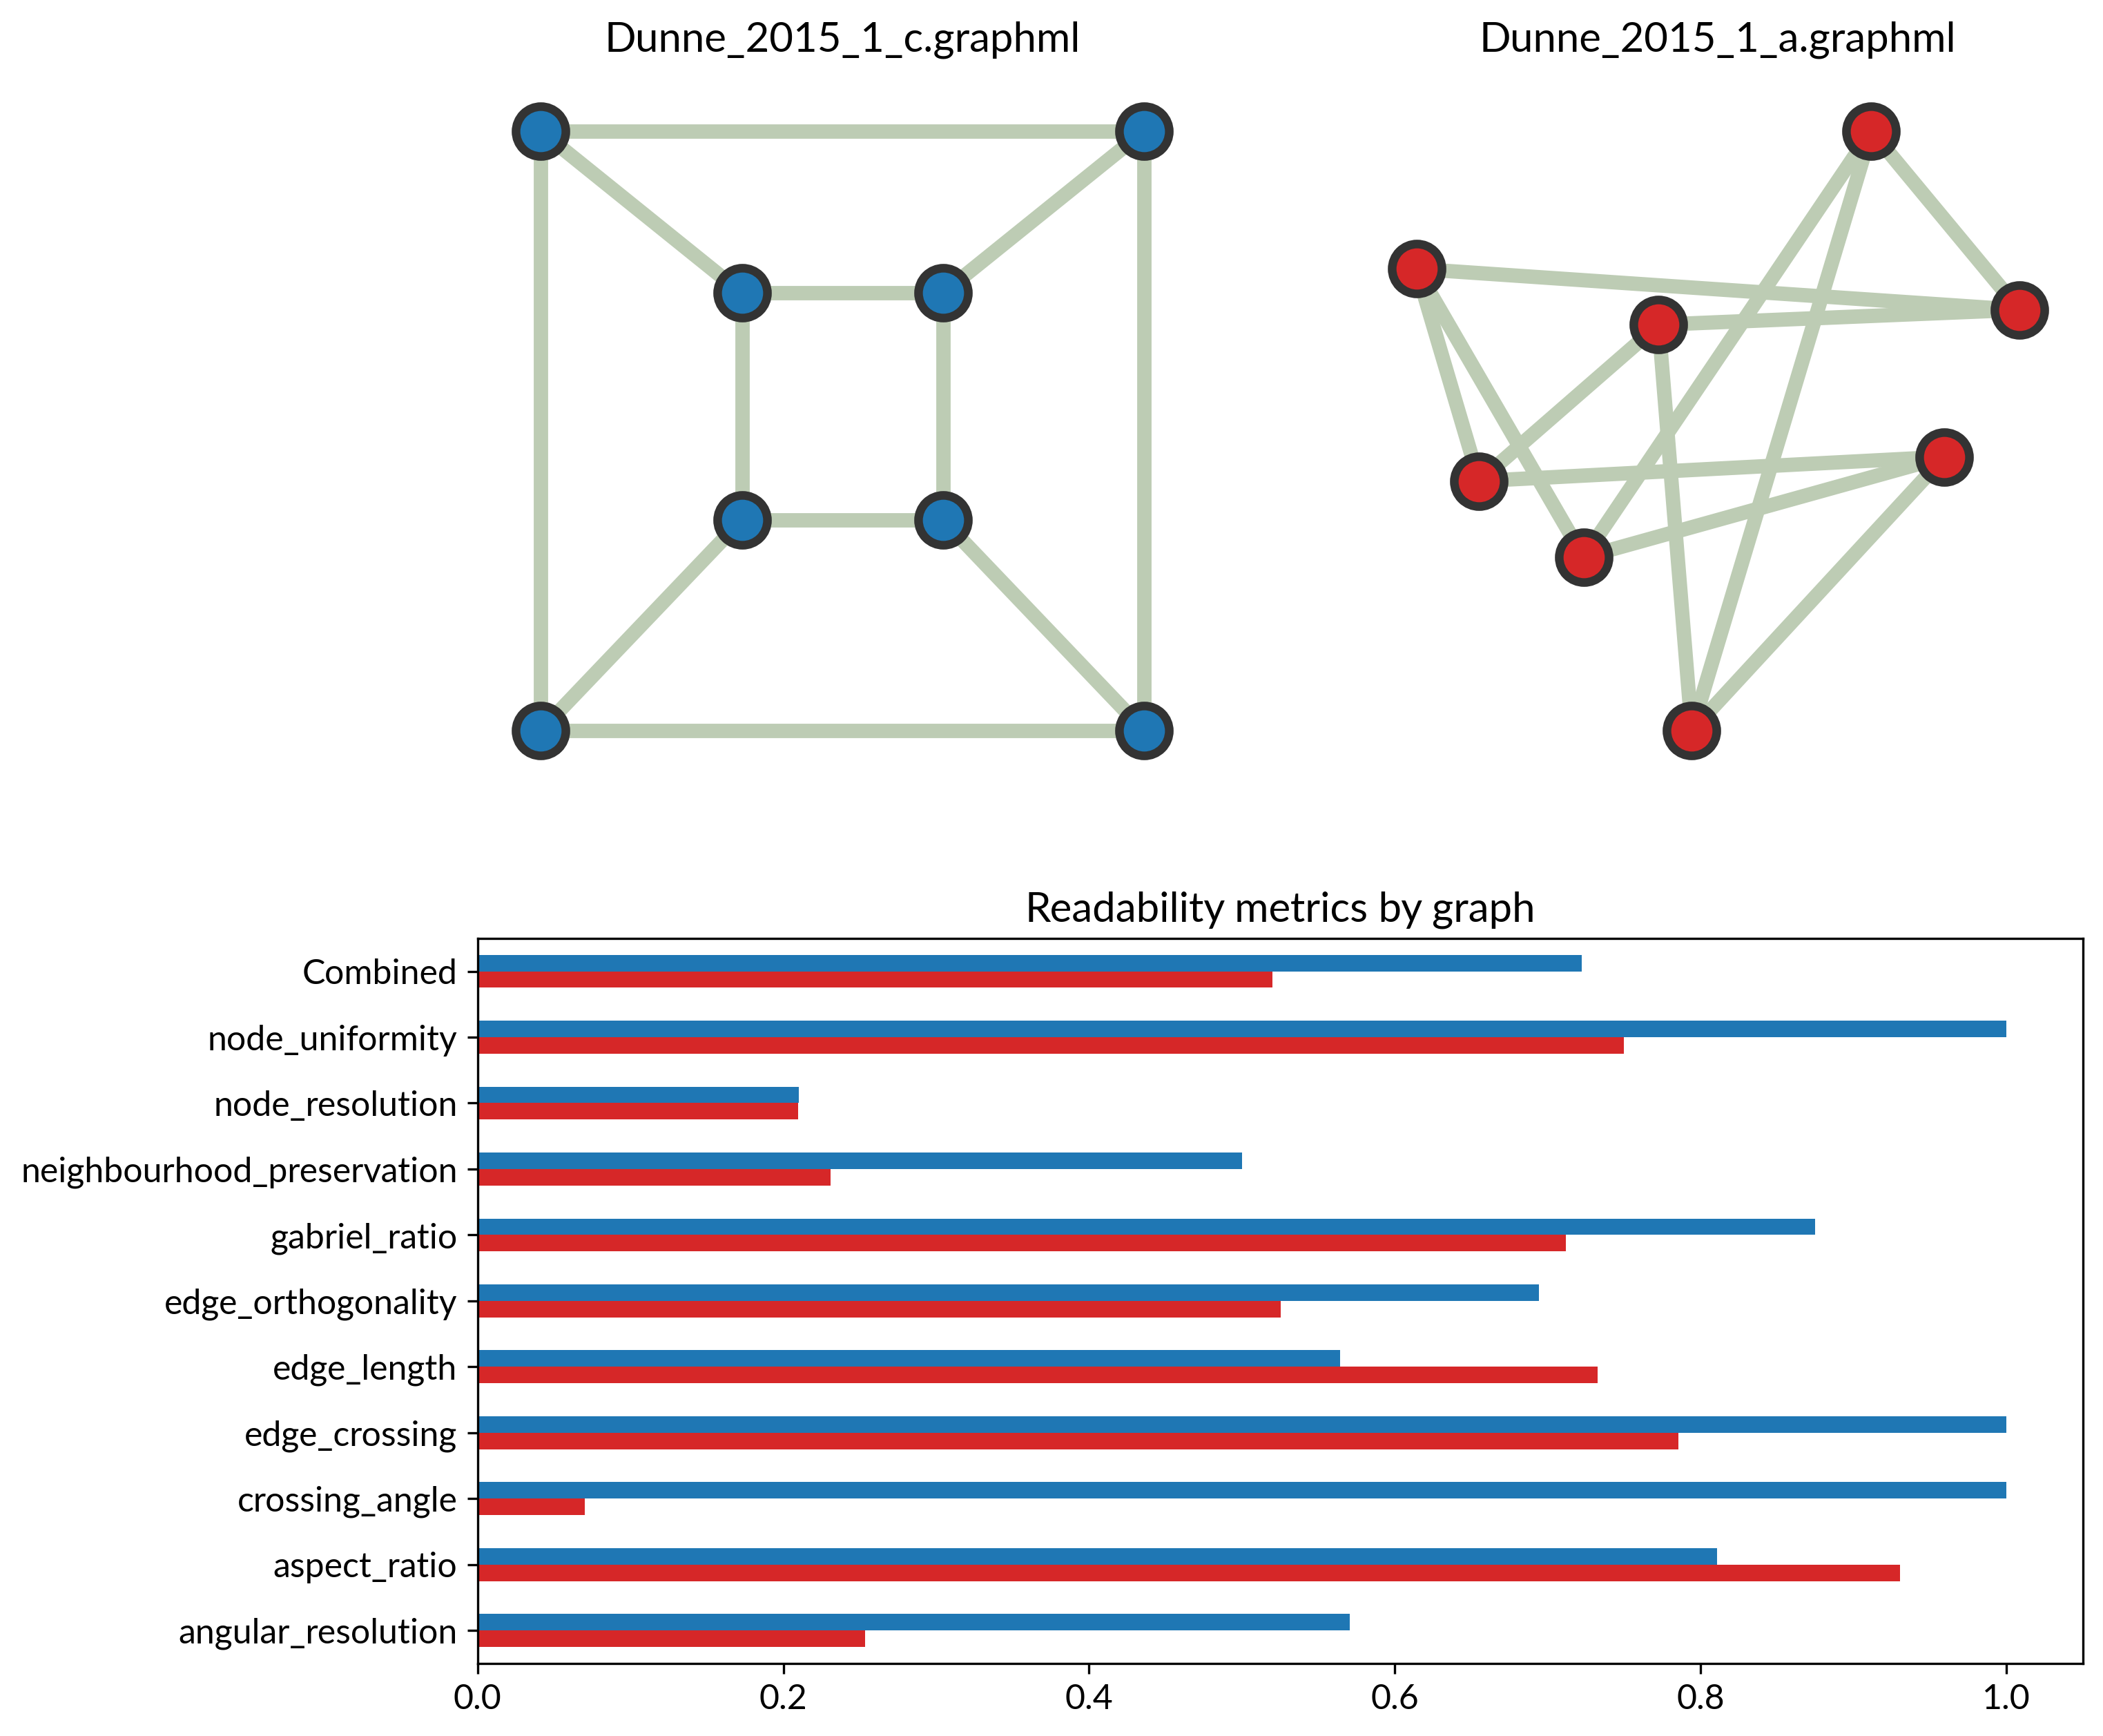

<Figure size 2400x1800 with 0 Axes>

In [14]:
# Plot the readability metrics as a horizontal barplot grouped by column name and colored by index
a = "Dunne_2015_1_c.graphml"
b = "Dunne_2015_1_a.graphml"
fig, axs = plt.subplots(2,2, figsize=(10, 10))
gs = axs[1,1].get_gridspec()
for ax in axs[1,:]:
    ax.remove()
ax_bottom = fig.add_subplot(gs[1,:])
tables.iloc[[3,0]].T.plot(ax=ax_bottom, kind='barh', stacked=False, color = ['tab:red', 'tab:blue'], legend=False)

ax_bottom.set_title("Readability metrics by graph")
gr.helpers.draw_graph(Gs[a], ax=axs[0][0], node_color='tab:blue')
axs[0, 0].set_title(a)
gr.helpers.draw_graph(Gs[b], ax=axs[0][1], node_color='tab:red')
axs[0, 1].set_title(b)
plt.show()
plt.savefig("../figs/combined.svg")

In [10]:
M_optimal = gr.naive_optimizer(gr.MetricsSuite(Gs[b]))
M_optimal.pretty_print_metrics()
b_optimal = b+"_optimal"
Gs[b_optimal] = M_optimal._graph

Calculated 10 metrics in 0.015 seconds.
Calculated 10 metrics in 0.034 seconds.
Calculated 10 metrics in 0.021 seconds.
Calculated 10 metrics in 0.016 seconds.
Best layout: shell. Score: 0.6030081654682269
--------------------------------------------------
Metric                        Value	Weight
--------------------------------------------------
angular_resolution            0.469	1
aspect_ratio                  1.000	1
crossing_angle                0.070	1
edge_crossing                 0.786	1
edge_length                   0.567	1
edge_orthogonality            0.500	1
gabriel_ratio                 0.844	1
neighbourhood_preservation    0.412	1
node_resolution               0.383	1
node_uniformity               1.000	1
--------------------------------------------------
Evaluation using weighted_sum: 0.60301
--------------------------------------------------


In [11]:
tables = pd.concat([tables, pd.DataFrame.from_records([M_optimal.metric_table()], index=[b_optimal], columns=metric_table.index)])
tables

,angular_resolution,aspect_ratio,crossing_angle,edge_crossing,edge_length,edge_orthogonality,gabriel_ratio,neighbourhood_preservation,node_resolution,node_uniformity,Combined
Dunne_2015_1_c.graphml,0.570384,0.810811,1.000000,1.000000,0.564179,0.694190,0.875000,0.500000,0.209934,1.000000,0.722450
Dunne_2015_1_b.graphml,0.586345,1.000000,0.830233,0.904762,0.890717,0.553719,0.972222,0.500000,0.273707,0.500000,0.701170
Dunne_2015_1_d.graphml,0.312553,0.715278,0.509530,0.913043,0.710631,0.439352,0.608247,0.288136,0.054880,0.666667,0.521832
Dunne_2015_1_a.graphml,0.253618,0.930636,0.069990,0.785714,0.732881,0.525225,0.711864,0.230769,0.209607,0.750000,0.520030
Sedgewick,0.110907,0.595036,-0.016406,0.740741,0.588843,0.514394,0.434783,0.125000,0.091827,0.750000,0.393512
Dunne_2015_1_a.graphml_optimal,0.468750,1.000000,0.069990,0.785714,0.567430,0.500000,0.843750,0.411765,0.382683,1.000000,0.603008


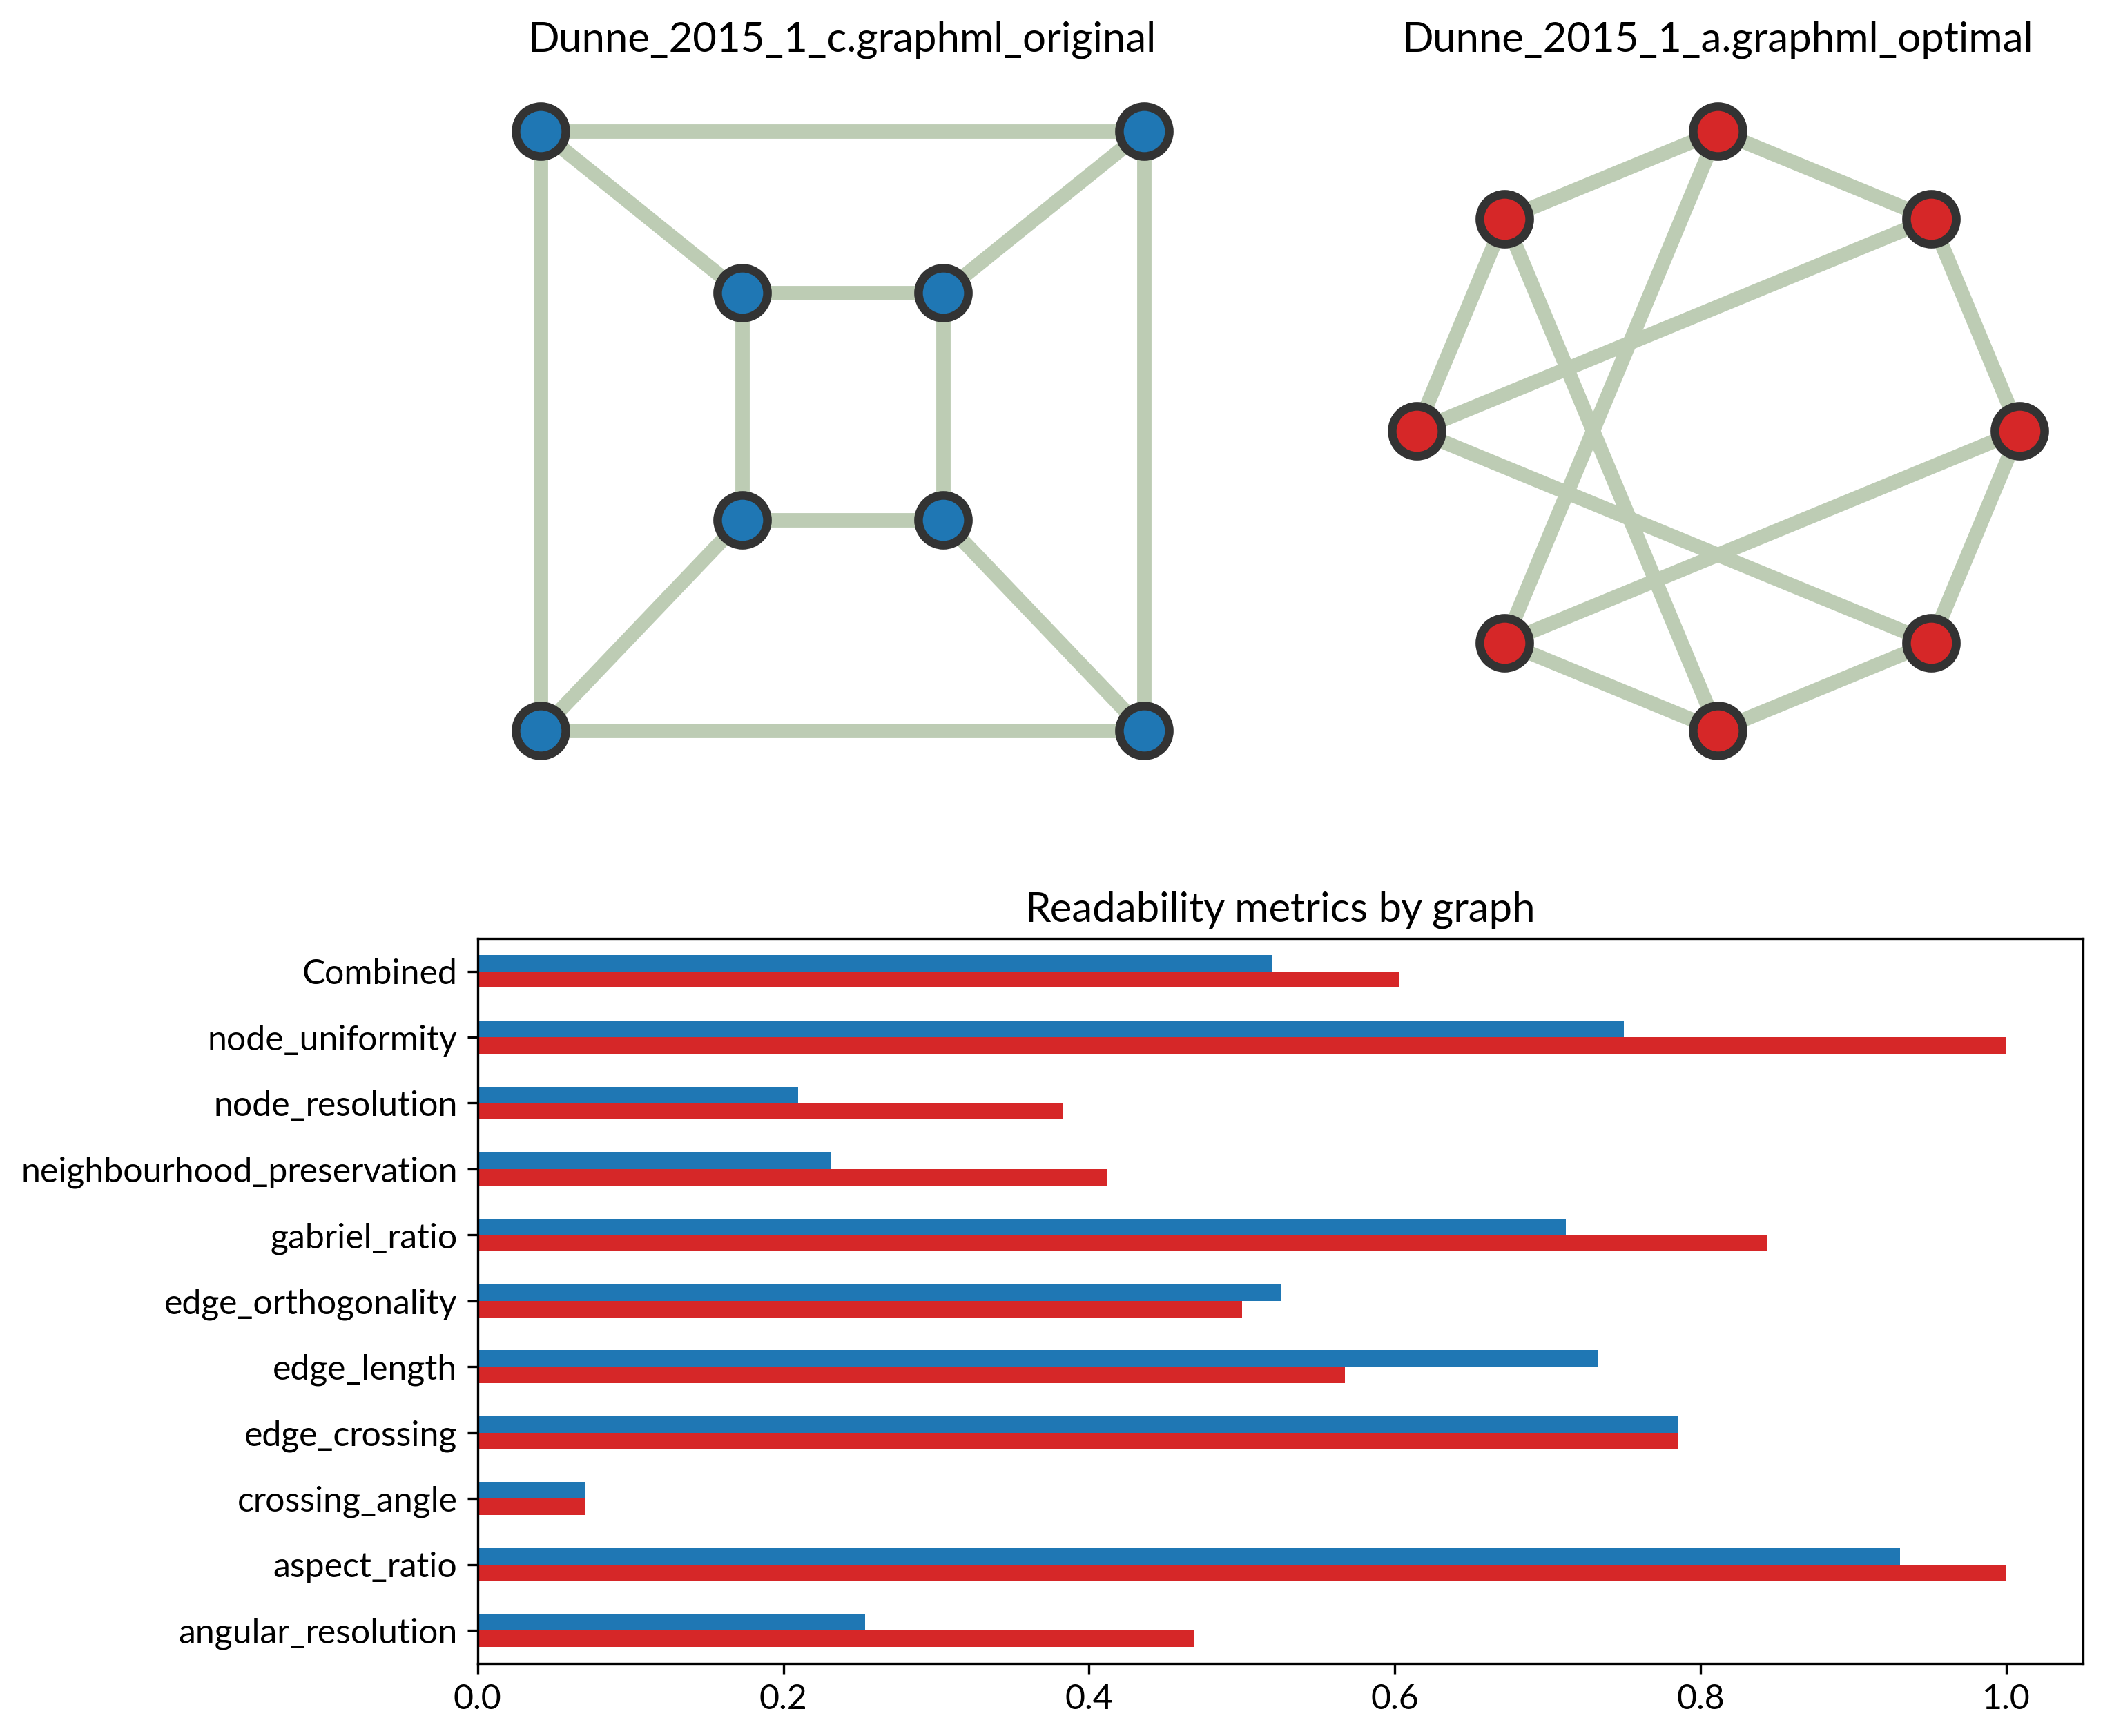

In [12]:
# Plot the readability metrics as a horizontal barplot grouped by column name and colored by index
fig, axs = plt.subplots(2,2, figsize=(10, 10))
gs = axs[1,1].get_gridspec()
for ax in axs[1,:]:
    ax.remove()
ax_bottom = fig.add_subplot(gs[1,:])
tables.iloc[[-1,3]].T.plot(ax=ax_bottom, kind='barh', stacked=False, color = ['tab:red', 'tab:blue'], legend=False)

ax_bottom.set_title("Readability metrics by graph")
gr.helpers.draw_graph(Gs[a], ax=axs[0][0], node_color='tab:blue')
axs[0, 0].set_title(a+"_original")
gr.helpers.draw_graph(Gs[b_optimal], ax=axs[0][1], node_color='tab:red')
axs[0, 1].set_title(b_optimal)
plt.show()

In [13]:
M

MetricsSuite(graph=, metric_weights={'angular_resolution': 1, 'aspect_ratio': 1, 'crossing_angle': 1, 'edge_crossing': 1, 'edge_length': 1, 'edge_orthogonality': 1, 'gabriel_ratio': 1, 'neighbourhood_preservation': 1, 'node_resolution': 1, 'node_uniformity': 1}, metric_combination_strategy=weighted_sum, sym_threshold=2, sym_tolerance={self.sym_tolerance})